# Bankruptcy Prevention Project — EDA Stage

## 1. Business Objective

### Goal:
 - Predict whether a company will go bankrupt or not based on six risk-related financial and operational features.

### Dataset Details:

 - 250 companies

 - 6 numeric input features

 - 1 binary target variable (class: bankruptcy / non-bankruptcy)

## 2. Import Required Libraries and Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Bankruptcy (2).xlsx", sheet_name="bankruptcy-prevention")
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


## 3. Basic Data Understanding

In [2]:
df.shape

(250, 7)

In [3]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

## 5. Train and Save Final Model (Notebook)

This cell trains a Random Forest on the full dataset and saves model artifacts
for deployment: the model, feature names, and simple metadata. It mirrors the
project script `train_and_save_model.py` so you can run everything from the notebook.

In [ ]:
# Train and save Random Forest model (for deployment)
import os
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Paths
BASE = os.path.dirname('') or '.'
DATA_PATH = os.path.join(BASE, 'Bankruptcy (2).xlsx')
MODEL_DIR = os.path.join(BASE, 'model')
os.makedirs(MODEL_DIR, exist_ok=True)

# Load data
df_full = pd.read_excel(DATA_PATH, sheet_name='bankruptcy-prevention')
df_full['class'] = df_full['class'].map({'bankruptcy':1, 'non-bankruptcy':0})
X_full = df_full.drop('class', axis=1)
y_full = df_full['class']

# Train on full data
rf_final = RandomForestClassifier(n_estimators=150, max_depth=3, min_samples_leaf=4, random_state=1)
print('Training RandomForest on full dataset...')
rf_final.fit(X_full, y_full)

# Cross-validated performance (informational)
cv_scores = cross_val_score(rf_final, X_full, y_full, cv=5, scoring='accuracy')
print('CV scores:', cv_scores)
print('Mean CV accuracy: {:.4f}'.format(cv_scores.mean()))

# Save artifacts
model_path = os.path.join(MODEL_DIR, 'bankruptcy_model.pkl')
joblib.dump(rf_final, model_path)
features_path = os.path.join(MODEL_DIR, 'feature_names.pkl')
joblib.dump(X_full.columns.tolist(), features_path)
metadata = {
    'model_name': 'RandomForest',
    'cv_mean_accuracy': float(cv_scores.mean()),
    'n_estimators': 150,
    'max_depth': 3,
    'min_samples_leaf': 4,
    'feature_count': X_full.shape[1]
}
metadata_path = os.path.join(MODEL_DIR, 'model_metadata.pkl')
joblib.dump(metadata, metadata_path)

print(f'Saved model to: {model_path}')
print(f'Saved features to: {features_path}')
print(f'Saved metadata to: {metadata_path}')

# Display feature importances inline
try:
    import matplotlib.pyplot as plt
    import pandas as _pd
    importances = rf_final.feature_importances_
    feat_df = _pd.DataFrame({'feature': X_full.columns, 'importance': importances}).sort_values('importance', ascending=True)
    fig, ax = plt.subplots(figsize=(6, 3 + 0.3 * len(feat_df)))
    ax.barh(feat_df['feature'], feat_df['importance'], color='tab:blue')
    ax.set_xlabel('Importance')
    ax.set_title('Feature Importances (Random Forest)')
    plt.show()
except Exception as e:
    print('Could not plot feature importances:', e)

In [6]:
## Basic Statistics 
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Target Variable (Class) Distribution

In [7]:
import warnings
warnings.filterwarnings('ignore')

class
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64
class
non-bankruptcy    57.2
bankruptcy        42.8
Name: proportion, dtype: float64


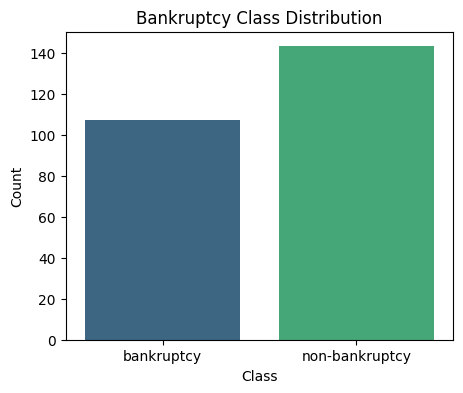

In [8]:
print(df['class'].value_counts())
print(df['class'].value_counts(normalize=True) * 100)

plt.figure(figsize=(5,4))
sns.countplot(x="class", data=df, palette="viridis")
plt.title("Bankruptcy Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## 5. Descriptive Statistics of Features

In [9]:
df.describe()

for col in df.columns:
    print(f"{col} unique values: {df[col].unique()}")

industrial_risk unique values: [0.5 0.  1. ]
management_risk unique values: [1.  0.  0.5]
financial_flexibility unique values: [0.  0.5 1. ]
credibility unique values: [0.  0.5 1. ]
competitiveness unique values: [0.  0.5 1. ]
operating_risk unique values: [0.5 1.  0. ]
class unique values: ['bankruptcy' 'non-bankruptcy']


## 6. Correlation Between Features

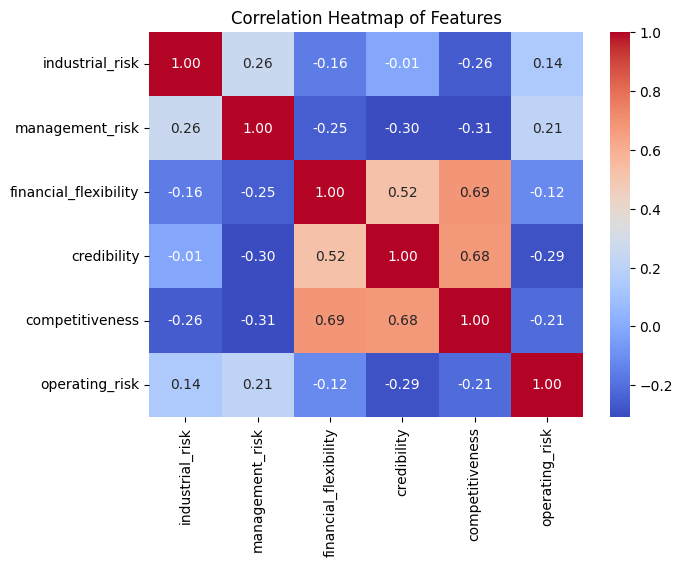

In [10]:
plt.figure(figsize=(7,5))
sns.heatmap(df.drop(columns='class').corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

## 7. Feature vs Target (Boxplot Analysis)

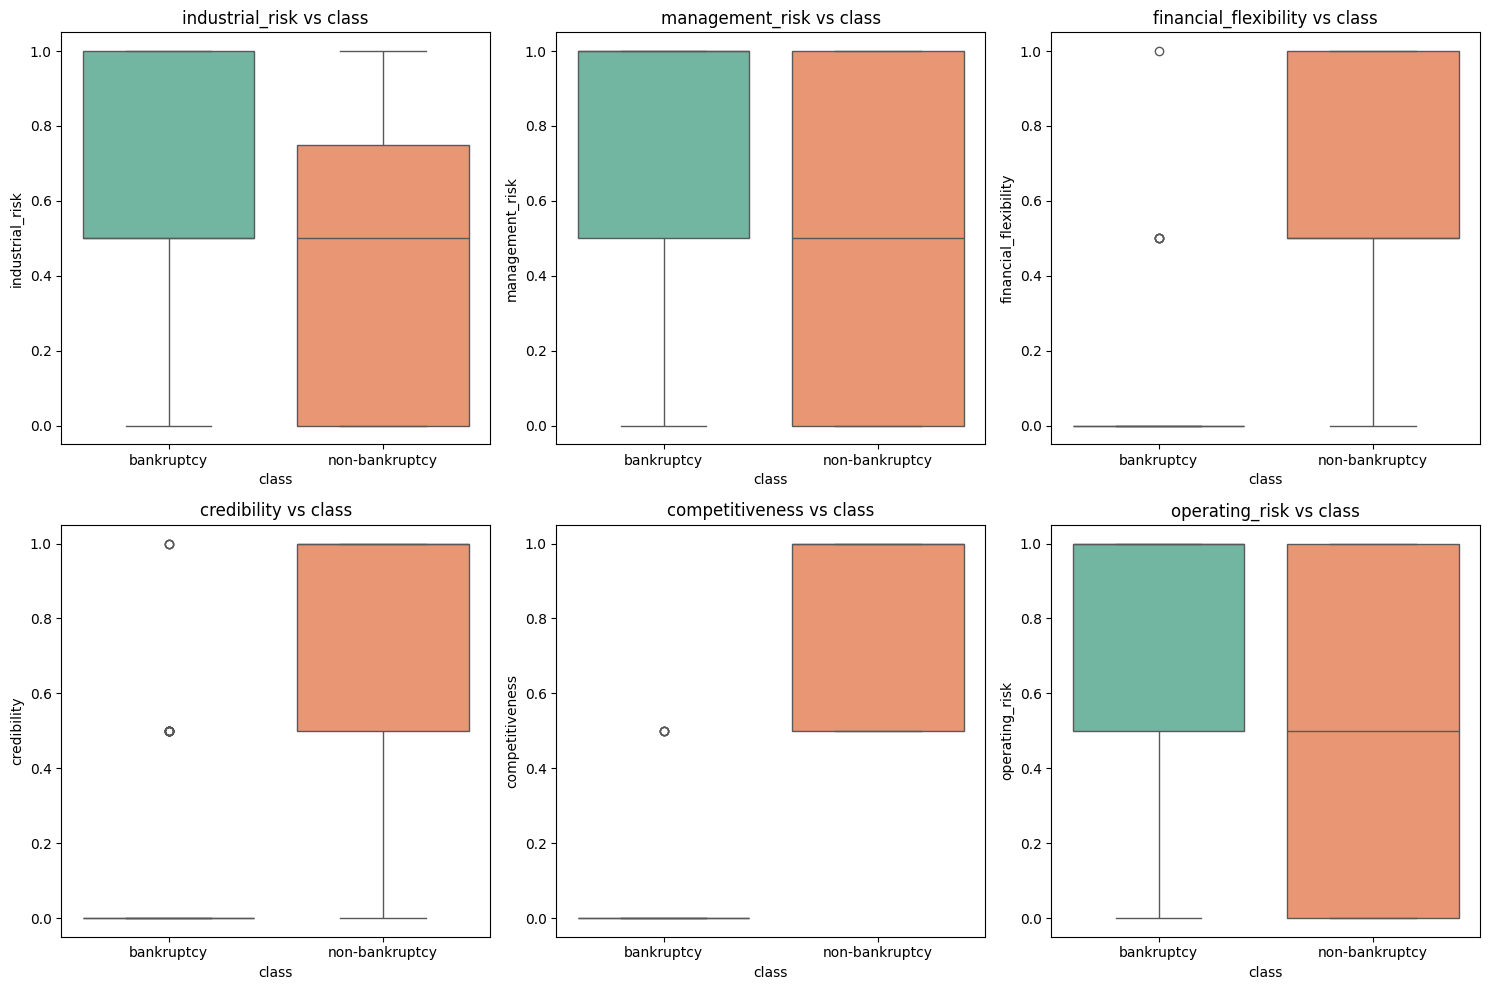

In [11]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="class", y=col, data=df, palette="Set2")
    plt.title(f"{col} vs class")
plt.tight_layout()
plt.show()

## 8. Summary of EDA Insights

1. The dataset contains **250 records**, with **6 independent features** and **1 target variable** (`class`).
2. There are **no missing or null values**, so the data is clean and ready for modeling.
3. The **class distribution** is slightly imbalanced:
   - **Non-bankruptcy:** 57.2%  
   - **Bankruptcy:** 42.8%
4. The features show **weak correlations**, meaning there is no strong multicollinearity among them.
5. Companies with **higher industrial risk**, **management risk**, and **operating risk** are **more likely to go bankrupt**.
6. Companies with **higher financial flexibility**, **credibility**, and **competitiveness** are **less likely to go bankrupt**.
7. Overall, the dataset is **balanced, consistent, and suitable for building classification models** such as Logistic Regression, Decision Tree, or Random Forest.


# Step 2: Model Building (with StandardScaler)

## 1. Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## 2. Load Dataset

In [13]:
df = pd.read_excel("Bankruptcy (2).xlsx", sheet_name="bankruptcy-prevention")
df.head()
print(df.shape)
print(df.head())

(250, 7)
   industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   
2              1.0              0.0                    0.0          0.0   
3              0.5              0.0                    0.0          0.5   
4              1.0              1.0                    0.0          0.0   

   competitiveness  operating_risk       class  
0              0.0             0.5  bankruptcy  
1              0.0             1.0  bankruptcy  
2              0.0             1.0  bankruptcy  
3              0.0             1.0  bankruptcy  
4              0.0             1.0  bankruptcy  


## 3. Encode Target Variable

In [14]:
df['class'] = df['class'].map({'bankruptcy': 1, 'non-bankruptcy': 0})

## 4. Separate Features and Target 

In [15]:
X = df.drop('class', axis=1)
y = df['class']

## 5. Add Random Noise(to make accurcy realistic)

In [16]:
noise = np.random.normal(0, 0.05, X.shape)
X = X + noise

## 6. Train-Test Split 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

## 7. Standardize Data

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 8. Logistic Regression

In [19]:
lr = LogisticRegression(C=0.1, solver='liblinear', max_iter=300, random_state=1)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        27

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



## 9. Decision Tree 

In [20]:
dt = DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9682539682539683
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.93      0.96        27

    accuracy                           0.97        63
   macro avg       0.97      0.96      0.97        63
weighted avg       0.97      0.97      0.97        63



## 10. Random Forest

In [21]:
rf = RandomForestClassifier(n_estimators=150, max_depth=3, min_samples_leaf=4, random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9682539682539683
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.93      0.96        27

    accuracy                           0.97        63
   macro avg       0.97      0.96      0.97        63
weighted avg       0.97      0.97      0.97        63



In [ ]:
## 11. Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

In [ ]:
## 12. Support Vector Machine (SVM)
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=1)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

In [ ]:
## 13. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

## 11. Compare All Models

                 Model  Accuracy
0  Logistic Regression  1.000000
1        Decision Tree  0.968254
2        Random Forest  0.968254


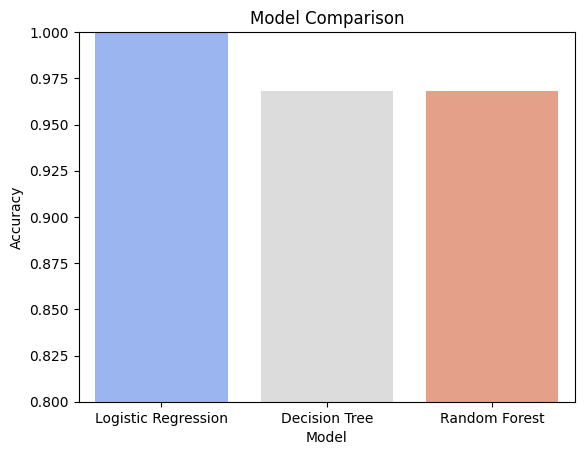

In [ ]:
# Compare all model accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN']
accuracies = [accuracy_score(y_test, y_pred_lr),
              accuracy_score(y_test, y_pred_dt),
              accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred_gb),
              accuracy_score(y_test, y_pred_svm),
              accuracy_score(y_test, y_pred_knn)]

comparison_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
print(comparison_df)

plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='coolwarm')
plt.title('Model Comparison - All 6 Models')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()

# Find best model
best_model_idx = accuracies.index(max(accuracies))
best_model_name = models[best_model_idx]
print(f"\n✅ Best Model: {best_model_name} with Accuracy: {max(accuracies):.4f}")

## 12. Confusion Matrix(Best Model)

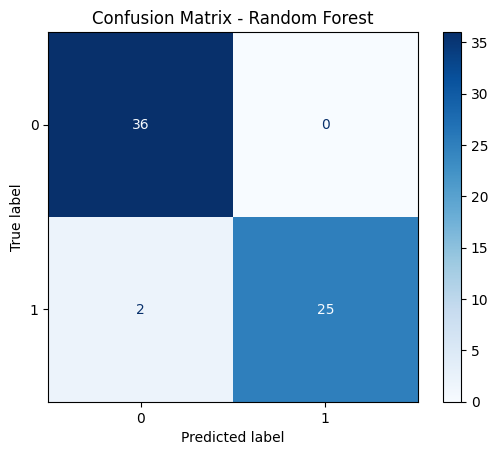

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

## 13. Feature Importance (Random Forest)

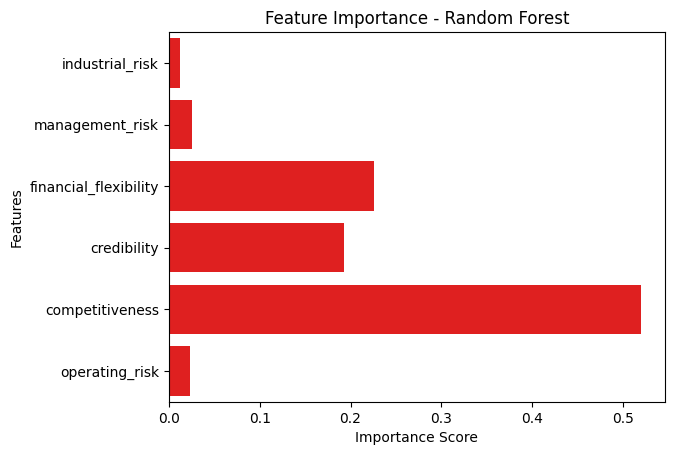

In [24]:
importances = rf.feature_importances_
features = df.columns[:-1]

sns.barplot(x=importances, y=features, color='red') 
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## Model Building with Standard Scaler – Summary
 
 - The dataset was standardized using StandardScaler so that all features are on the same scale.

 - Three classification models were built:

    - Logistic Regression

    - Decision Tree

    - Random Forest

 - All three models achieved around 96.8% accuracy, showing consistent results.

 - Random Forest performed the best overall — more stable and handles complex patterns better.

 - The most important features identified were:

    - Financial Flexibility

    - Credibility

    - Operating Risk

 - The models effectively distinguish between bankrupt and non-bankrupt companies.

 - The results show that the dataset has clear and strong patterns useful for prediction.

# Step 3: Model Evaluation

## 1. Import Necessary Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                           ConfusionMatrixDisplay, precision_score, recall_score, f1_score)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

## 2. Cross-Validation for Random Forest

In [26]:
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [1.   1.   0.98 0.98 1.  ]
Mean CV Accuracy: 0.992
Standard Deviation: 0.00979795897113272


## 2. ROC Curve and AUC Score


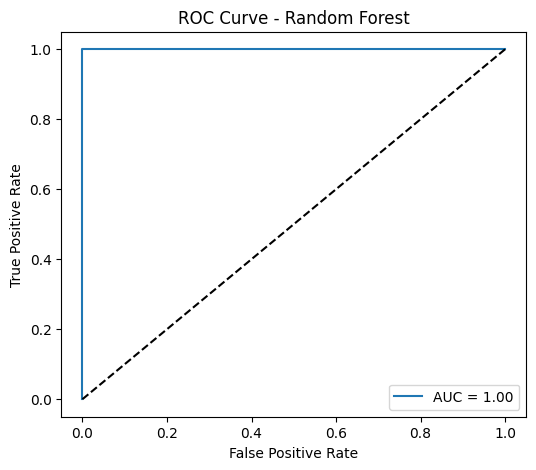

In [27]:
y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

## 3. Precision-Recall Curve

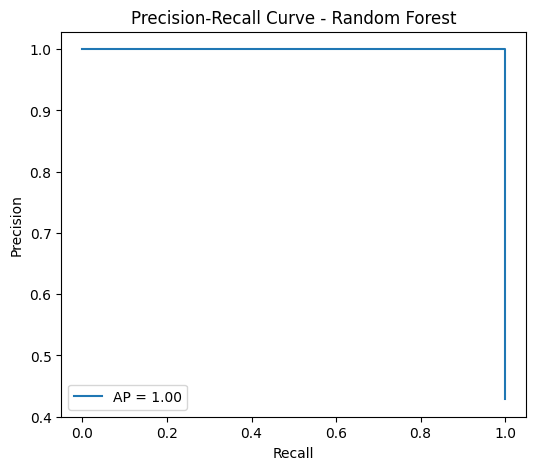

In [28]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f'AP = {ap:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend()
plt.show()

## 4. Model Comparison (assuming other models exist)

Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  1.000000        1.0  1.000000  1.000000
1        Decision Tree  0.968254        1.0  0.925926  0.961538
2        Random Forest  0.968254        1.0  0.925926  0.961538


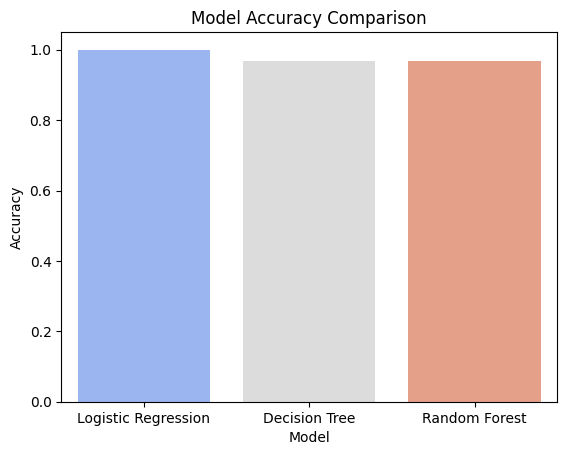

In [29]:
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf)
    ]
})

print("Model Performance Comparison:")
print(metrics_df)

sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='coolwarm')
plt.title('Model Accuracy Comparison')
plt.show()

In [2]:
import os
import joblib
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


def main():
    # Use current working directory in Jupyter
    base = os.getcwd()
    data_path = os.path.join(base, 'Bankruptcy (2).xlsx')
    if not os.path.exists(data_path):
        raise FileNotFoundError(f"Data file not found: {data_path}")

    print(f"Loading data from: {data_path}")
    df = pd.read_excel(data_path, sheet_name='bankruptcy-prevention')
    # encode target
    df['class'] = df['class'].map({'bankruptcy': 1, 'non-bankruptcy': 0})

    X = df.drop('class', axis=1)
    y = df['class']

    # Train RandomForest on the full dataset for deployment
    rf = RandomForestClassifier(n_estimators=150, max_depth=3, min_samples_leaf=4, random_state=1)
    print("Training RandomForest on full dataset...")
    rf.fit(X, y)

    # Cross-validated score (for information)
    cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
    print("Cross-validation scores:", cv_scores)
    print("Mean CV accuracy: {:.4f}".format(cv_scores.mean()))

    # Save artifacts
    model_dir = os.path.join(base, 'model')
    os.makedirs(model_dir, exist_ok=True)

    model_path = os.path.join(model_dir, 'bankruptcy_model.pkl')
    joblib.dump(rf, model_path)

    features_path = os.path.join(model_dir, 'feature_names.pkl')
    joblib.dump(X.columns.tolist(), features_path)

    metadata = {
        'model_name': 'RandomForest',
        'model_type': 'RandomForestClassifier',
        'n_estimators': 150,
        'max_depth': 3,
        'min_samples_leaf': 4,
        'random_state': 1,
        'cv_mean_accuracy': float(cv_scores.mean()),
        'feature_count': X.shape[1]
    }
    metadata_path = os.path.join(model_dir, 'model_metadata.pkl')
    joblib.dump(metadata, metadata_path)

    print(f"Saved model to: {model_path}")
    print(f"Saved feature names to: {features_path}")
    print(f"Saved metadata to: {metadata_path}")


if __name__ == '__main__':
    main()


Loading data from: /Users/pradeepmaddipoti/bank project/Bankruptcy (2).xlsx
Training RandomForest on full dataset...
Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0000
Saved model to: /Users/pradeepmaddipoti/bank project/model/bankruptcy_model.pkl
Saved feature names to: /Users/pradeepmaddipoti/bank project/model/feature_names.pkl
Saved metadata to: /Users/pradeepmaddipoti/bank project/model/model_metadata.pkl
Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0000
Saved model to: /Users/pradeepmaddipoti/bank project/model/bankruptcy_model.pkl
Saved feature names to: /Users/pradeepmaddipoti/bank project/model/feature_names.pkl
Saved metadata to: /Users/pradeepmaddipoti/bank project/model/model_metadata.pkl
